# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
1,731,103,52,103,170,52,7,236,28,26,160,254,816,250,82,3,23,183,184
2,395,97,37,76,169,60,8,161,41,20,131,189,391,136,72,0,0,188,192
3,33,101,48,107,222,68,10,208,32,24,154,232,641,204,70,5,38,190,202
4,805,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
5,704,99,52,104,177,55,10,210,32,24,166,219,657,215,73,3,2,187,194
6,173,96,49,98,187,59,6,213,31,24,152,228,680,210,77,8,28,188,189
7,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
8,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203
9,129,100,48,95,209,68,7,199,32,23,150,216,605,200,73,7,11,192,194


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.994536,93.744991,44.894353,81.987250,168.797814,61.579235,8.561020,169.231330,40.803279,20.601093,147.983607,188.663024,441.575592,175.081967,72.579235,6.428051,12.500911,188.854281,195.520947
std,246.507410,8.300943,6.161434,16.040944,33.614728,7.808357,4.417369,32.718653,7.778498,2.550096,14.564784,30.708622,173.300571,32.235485,7.139359,4.972260,9.025031,6.194880,7.467571
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,168.000000,320.000000,149.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,406.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,629.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,596.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,842.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,262.000000,119.000000,22.000000,38.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Мы видим, что в нашей модели нет пропусков, это хорошо, значит нам не нужно заполнять пропуски средним значением. Также можно заметить, что например у 0 признака очень большой разброс данных: от 1 до 844, поэтому данные нужно маштабировать, мы сделаем это с помощью самого популярного метода - нормализации: вычитание среднего из каждого признака и деление на стандартное отклонение.

In [6]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train)
x_train_standart = normalizer.transform(X_train)
x_test_standart = normalizer.transform(X_test)

Посмотрим на классы, по которым нам нужно будет классифицировать

In [7]:
target_labels = np.unique(target).tolist()
target_labels

['bus', 'opel', 'saab', 'van']

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from cProfile import label
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score
import scikitplot

f1_samples = make_scorer(f1_score, labels=target_labels, average='macro')

clf_log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
grid = {'C': np.logspace(-3, 5, 50), 'penalty': ['l1', 'l2']}

cv_f1_log_reg = GridSearchCV(clf_log_reg, grid, cv=5, scoring=f1_samples).fit(x_train_standart, y_train)
cv_accuracy_log_reg = GridSearchCV(clf_log_reg, grid, cv=5, scoring='accuracy').fit(x_train_standart, y_train)


/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
cv_f1_log_reg_best_params = cv_f1_log_reg.best_params_
cv_f1_log_reg_best_score = cv_f1_log_reg.best_score_
print("best hyperparameters with f1 score: ", cv_f1_log_reg_best_params)
print("best score with f1 score: ", cv_f1_log_reg_best_score)

best hyperparameters with f1 score:  {'C': 17.575106248547893, 'penalty': 'l1'}
best score with f1 score:  0.7931963100507604


In [10]:
cv_accuracy_log_reg_best_params = cv_accuracy_log_reg.best_params_
cv_accuracy_log_reg_best_score = cv_accuracy_log_reg.best_score_
print("best hyperparameters with accuracy score: ", cv_accuracy_log_reg_best_params)
print("best score with accuracy score: ", cv_accuracy_log_reg_best_score)

best hyperparameters with accuracy score:  {'C': 17.575106248547893, 'penalty': 'l1'}
best score with accuracy score:  0.7923102585487907


Возьмем score по f1 и сохраним его лучшие параметры

In [11]:
C_log_reg = cv_f1_log_reg_best_params['C']
penalty_log_reg = cv_f1_log_reg_best_params['penalty']

In [51]:
clf_best_log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C_log_reg, penalty=penalty_log_reg)
log_reg  = clf_best_log_reg
log_reg.fit(x_train_standart, y_train)

y_predict = log_reg.predict(x_test_standart)
print("accuracy score on test data: ", accuracy_score(y_true=y_test, y_pred=y_predict))
print("f1 score on test data: ", f1_score(y_test, y_predict, labels=target_labels, average='macro'))

accuracy score on test data:  0.797979797979798
f1 score on test data:  0.7945181409818605


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

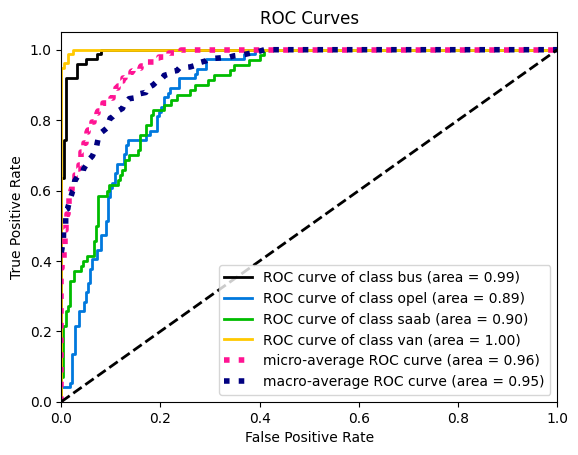

In [52]:
y_predict = log_reg.predict_proba(x_test_standart)
scikitplot.metrics.plot_roc(y_test, y_predict)

По графику видим, что лучше всех классифицируется класс "van", а хуже всего - "saab". Но у всех классов судя  по графику результат довольно хороший и они достаточно точно распознаются логистической регрессией.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

<Figure size 1200x600 with 0 Axes>

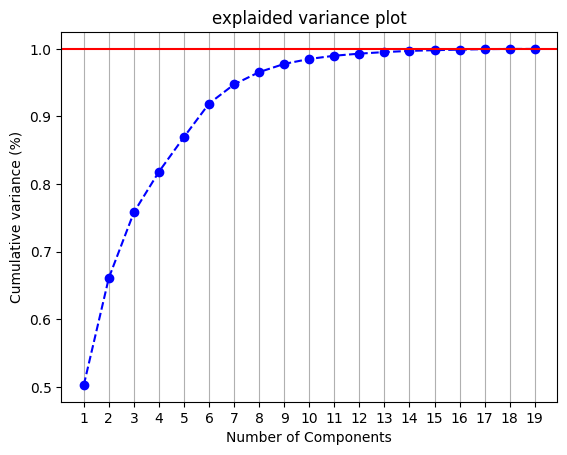

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
x_train_pca = pca.fit_transform(x_train_standart)
exp_var_pca = pca.explained_variance_ratio_

cum_sum_var_pca = np.cumsum(exp_var_pca)
x = np.arange(1, len(exp_var_pca) + 1)

plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
plt.plot(x, cum_sum_var_pca, marker='o', linestyle='--', color='b')
plt.axhline(y=1, color='r', linestyle='-')
plt.ylabel('Cumulative variance (%)')
plt.xlabel('Number of Components')
plt.xticks(x)
ax.grid(axis='x')
plt.title('explaided variance plot')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

По графику видно, что чтобы достичь 100% объясненной дисперсии, нужно взять 17 признаков, но можно и меньше, потому что начиная с 12 признака отклонение не такое заметное.  
При использовании PCA нам всегда нужно нормализовывать данные. Если PCA применяется к ненормализованному набору объектов, результирующие нагрузки для объектов с высокой дисперсией также будут большими. Следовательно, основные компоненты будут смещены в сторону объектов с высокой дисперсией, что приведет к ложным результатам.
Но вообще 19 признаков это слишком мало, чтобы применять pca, поэтому по графику не видно сильно резких скачков и вдальнейшем не особо будет ощутима разница между 19 принаками или 15 признаками

In [14]:
pca = PCA(n_components=12)

pca.fit(x_train_standart)
x_train_pca = pca.transform(x_train_standart)
x_test_pca = pca.transform(x_test_standart)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
from cProfile import label
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import scikitplot

f1_samples = make_scorer(f1_score, labels=target_labels, average='macro')

clf_log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
grid = {'C': np.logspace(-3, 5, 50), 'penalty': ['l1', 'l2']}

cv_f1_log_reg_pca = GridSearchCV(clf_log_reg_pca, grid, cv=5, scoring=f1_samples).fit(x_train_pca, y_train)
cv_accuracy_log_reg_pca = GridSearchCV(clf_log_reg_pca, grid, cv=5, scoring='accuracy').fit(x_train_pca, y_train)


In [16]:
cv_f1_log_reg_pca_best_params = cv_f1_log_reg_pca.best_params_
cv_f1_log_reg_pca_best_score = cv_f1_log_reg_pca.best_score_
print("best hyperparameters with f1 score: ", cv_f1_log_reg_pca_best_params)
print("best score with f1 score: ", cv_f1_log_reg_pca_best_score)

best hyperparameters with f1 score:  {'C': 2.6826957952797246, 'penalty': 'l1'}
best score with f1 score:  0.7425423066597291


In [17]:
cv_accuracy_log_reg_pca_best_params = cv_accuracy_log_reg_pca.best_params_
cv_accuracy_log_reg_pca_best_score = cv_accuracy_log_reg_pca.best_score_
print("best hyperparameters with accuracy score: ", cv_accuracy_log_reg_pca_best_params)
print("best score with accuracy score: ", cv_accuracy_log_reg_pca_best_score)

best hyperparameters with accuracy score:  {'C': 1.8420699693267144, 'penalty': 'l1'}
best score with accuracy score:  0.7413344453711426


In [18]:
C_log_reg_pca = cv_f1_log_reg_pca_best_params['C']
penalty_log_reg_pca = cv_f1_log_reg_pca_best_params['penalty']

In [53]:
clf_best_log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, C=C_log_reg_pca, penalty=penalty_log_reg_pca).fit(x_train_pca, y_train)
y_predict = clf_best_log_reg_pca.predict(x_test_pca)
print("accuracy score on test data: ", accuracy_score(y_true=y_test, y_pred=y_predict))
print("f1 score on test data: ", f1_score(y_test, y_predict, labels=target_labels, average='macro'))

accuracy score on test data:  0.734006734006734
f1 score on test data:  0.730055729194109


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

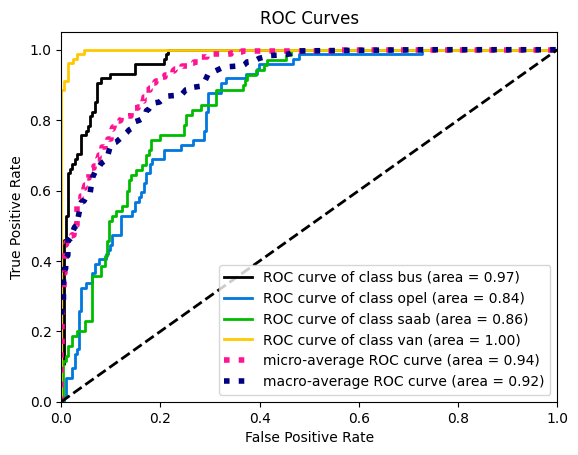

In [54]:
clf_best_log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, C=C_log_reg_pca, penalty=penalty_log_reg_pca).fit(x_train_pca, y_train)
y_predict = clf_best_log_reg_pca.predict_proba(x_test_pca)

scikitplot.metrics.plot_roc(y_test, y_predict)

По результатам видим, что общий score упал примерно на 5% из-за того, что мы оставили только 12 из 19 признаков. Это маленький скачок, значит выбор был сделан правильно. Но по графику теперь хуже всего классифицируется "opel", но разница в 0.01, что довольно мало, так что с применением pca график почти что не изменился

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from cProfile import label
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import scikitplot
from sklearn.pipeline import Pipeline

normalizer = StandardScaler()
tree_decision = DecisionTreeClassifier()
pipe_dec_tree = Pipeline(steps=[('scaler', normalizer), ('clf', tree_decision)])

max_depth = np.arange(1, 101, 2)
grid = {'clf__max_depth': max_depth}

f1_samples = make_scorer(f1_score, labels=target_labels, average='macro')

cv_f1_dec_tree = GridSearchCV(pipe_dec_tree, grid, cv=5, scoring=f1_samples).fit(X_train, y_train)
cv_accuracy_dec_tree = GridSearchCV(pipe_dec_tree, grid, cv=5, scoring='accuracy').fit(X_train, y_train)

In [21]:
cv_f1_dec_tree_best_params = cv_f1_dec_tree.best_params_
cv_f1_dec_tree_best_score = cv_f1_dec_tree.best_score_
print("best hyperparameters with f1 score: ", cv_f1_dec_tree_best_params)
print("best score with f1 score: ", cv_f1_dec_tree_best_score)

best hyperparameters with f1 score:  {'clf__max_depth': 5}
best score with f1 score:  0.6953468975236636


In [22]:
cv_accuracy_dec_tree_best_params = cv_accuracy_dec_tree.best_params_
cv_accuracy_dec_tree_best_score = cv_accuracy_dec_tree.best_score_
print("best hyperparameters with accuracy score: ", cv_accuracy_dec_tree_best_params)
print("best score with accuracy score: ", cv_accuracy_dec_tree_best_score)

best hyperparameters with accuracy score:  {'clf__max_depth': 17}
best score with accuracy score:  0.6940283569641368


Возьмем лушчие гиперпараметры по первой оценке

In [55]:
max_depth_dec_tree = cv_f1_dec_tree_best_params['clf__max_depth']

clf_best_dec_tree = DecisionTreeClassifier(max_depth=max_depth_dec_tree)
dec_tree = clf_best_dec_tree
dec_tree.fit(x_train_standart, y_train)
y_predict = dec_tree.predict(x_test_standart)
print("accuracy score on test data: ", accuracy_score(y_true=y_test, y_pred=y_predict))
print("f1 score on test data: ", f1_score(y_test, y_predict, labels=target_labels, average='macro'))

accuracy score on test data:  0.6632996632996633
f1 score on test data:  0.6501958560255261


Score модели решающего деревав получился ниже почти на 10%.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [44]:
from ensurepip import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


N_min = 2
N_max = 100
n_est = np.arange(N_min, N_max + 1, 2)

f1_samples = make_scorer(f1_score, labels=target_labels, average='macro')

normalizer = StandardScaler()
pipe_log_reg = Pipeline(steps=[('scaler', normalizer), ('clf', clf_best_log_reg)])
pipe_dec_tree = Pipeline(steps=[('scaler', normalizer), ('clf', clf_best_dec_tree)])

In [45]:
f1_score_log_reg = []
accuracy_score_log_reg = []
f1_score_dec_tree = []
accuracy_score_dec_tree = []

for N in range(N_min, N_max + 1, 2):
    bagging_log_reg = BaggingClassifier(base_estimator=pipe_log_reg, n_estimators=N, random_state=1, n_jobs=5)
    bagging_dec_tree = BaggingClassifier(base_estimator=pipe_dec_tree, n_estimators=N, random_state=1, n_jobs=5)
    
    bagging_log_reg.fit(X_train, y_train)
    bagging_dec_tree.fit(X_train, y_train)

    y_pred_log_reg = bagging_log_reg.predict(X_test)
    y_pred_dec_tree = bagging_dec_tree.predict(X_test)

    f1_score_log_reg.append(f1_score(y_true=y_test, y_pred=y_pred_log_reg, labels=target_labels, average='macro'))
    f1_score_dec_tree.append(f1_score(y_true=y_test, y_pred=y_pred_dec_tree, labels=target_labels, average='macro'))
    accuracy_score_log_reg.append(accuracy_score(y_true=y_test, y_pred=y_pred_log_reg))
    accuracy_score_dec_tree.append(accuracy_score(y_true=y_test, y_pred=y_pred_dec_tree))

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-

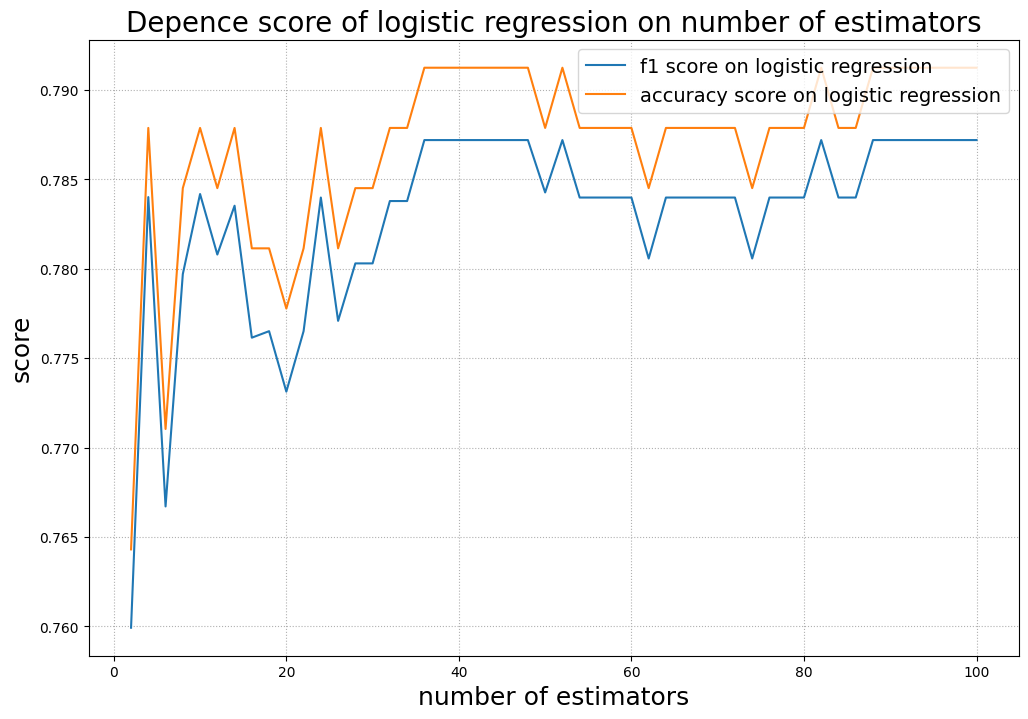

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(N_min, N_max + 1, 2), f1_score_log_reg, label='f1 score on logistic regression')
plt.plot(np.arange(N_min, N_max + 1, 2), accuracy_score_log_reg, label='accuracy score on logistic regression')
plt.xlabel('number of estimators', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of logistic regression on number of estimators', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

In [47]:
print("Лучшее значение количества алгоритмов в логистической регрессии: ", n_est[np.argmax(f1_score_log_reg)])

Лучшее значение количества алгоритмов в логистической регрессии:  36


По графику мы видим, что score меняется скачками и как будто бы при увеличении алгоритмов он стабилизируется и если бы взять еще больше N, то таких сильных скачков как в начале мы бы не заметили. Так же accurace score преимущественно показывает всегда результат лучше чем f1. Для логистической регрессии нужно достаточно большое количество алгоритмов, это может быть связано с тем, что значение сигмоиды значительно меняется при разных наборых данных.

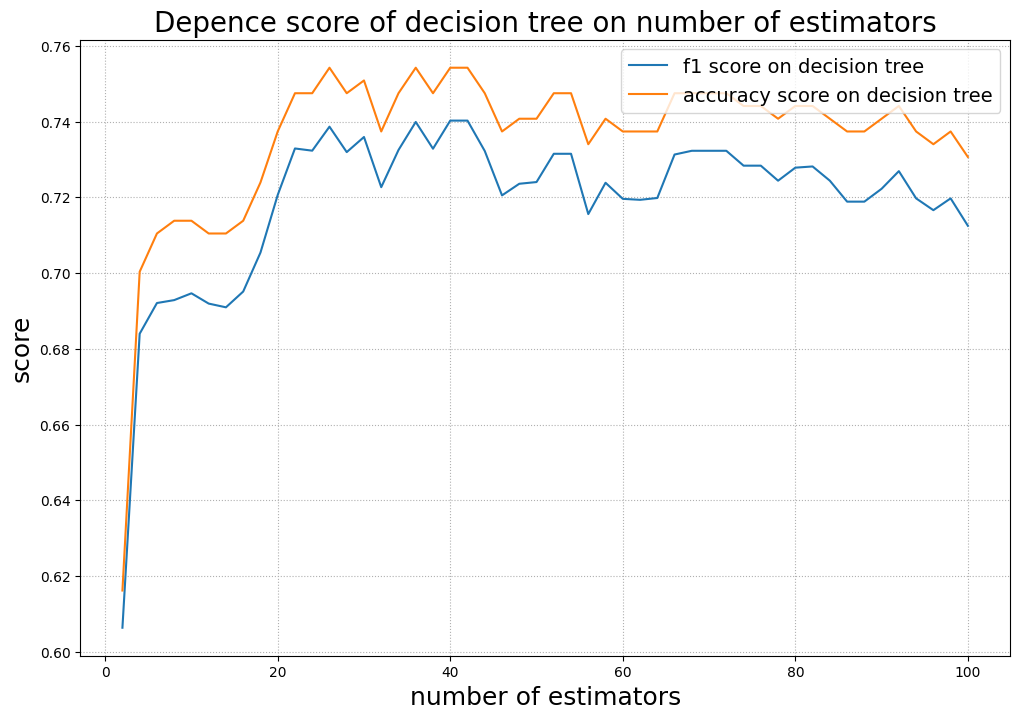

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(N_min, N_max + 1, 2), f1_score_dec_tree, label='f1 score on decision tree')
plt.plot(np.arange(N_min, N_max + 1, 2), accuracy_score_dec_tree, label='accuracy score on decision tree')
plt.xlabel('number of estimators', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of decision tree on number of estimators', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

In [56]:
print("Лучшее значение количества алгоритмов в решающих деревьях: ", n_est[np.argmax(f1_score_dec_tree)])

Лучшее значение количества алгоритмов в решающих деревьях:  40


С решающими деревьями ситуация обстоит по другому, значение алгооритмов здесь больше. Возможно в этом случае лучше взять меньшую максимальную глубину и большее количество алгоритмов, чтобы дерево не переобучалось и score был выше.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [66]:
from sklearn.ensemble import RandomForestClassifier
from cProfile import label
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import scikitplot

n_est = np.arange(N_min, N_max + 1, 2)

In [67]:
f1_score_rand_forest = []
accuracy_score_rand_forest = []

for N in n_est:
    rand_forest = RandomForestClassifier(n_estimators=N)
    
    rand_forest.fit(X_train, y_train)

    y_pred_rand_forest = rand_forest.predict(X_test)

    f1_score_rand_forest.append(f1_score(y_true=y_test, y_pred=y_pred_rand_forest, labels=target_labels, average='macro'))
    accuracy_score_rand_forest.append(accuracy_score(y_true=y_test, y_pred=y_pred_rand_forest))

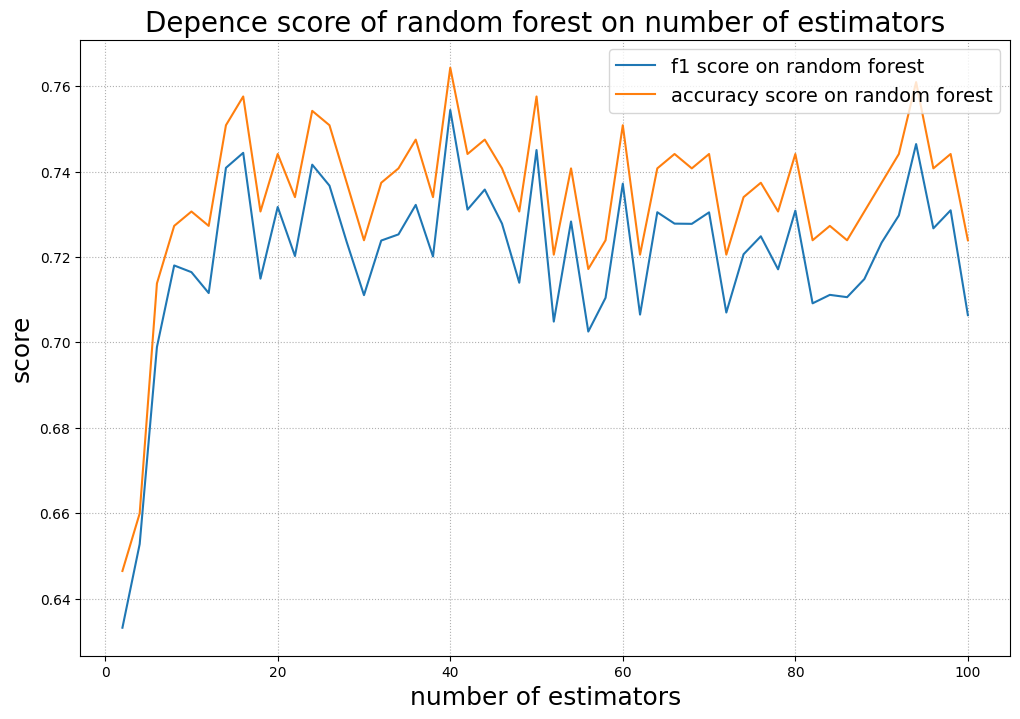

In [68]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(N_min, N_max + 1, 2), f1_score_rand_forest, label='f1 score on random forest')
plt.plot(np.arange(N_min, N_max + 1, 2), accuracy_score_rand_forest, label='accuracy score on random forest')
plt.xlabel('number of estimators', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of random forest on number of estimators', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

In [69]:
print("Лучшее значение количества деревьев: ", n_est[np.argmax(f1_score_rand_forest)])
best_n_est = n_est[np.argmax(f1_score_rand_forest)]

Лучшее значение количества деревьев:  40


С решающими деревьями значение практически то же самое, а вот по сравнению с логистической регрессией отличается, там нужно намного алгоритмов для лучшего результата. Это может быть связано с тем, что совершенно различается подход в обучении и с тем, что у нас выбрана достаточно большая глубина.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [58]:
normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train)
x_train_standart = normalizer.transform(X_train)
x_test_standart = normalizer.transform(X_test)

idx = np.arange(55, 549, 55)
split_x = np.split(x_train_standart, idx.tolist())
split_x_base = np.split(X_train, idx.tolist())
split_y = np.split(y_train, idx.tolist())

sizes = np.append(idx, X_train.shape[0])

Logistic regression

In [59]:
f1_score_logistic = []
accuracy_score_logistic = []
data_train = split_x[0]
target_train = split_y[0]

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C_log_reg, penalty=penalty_log_reg)
log_reg.fit(data_train, target_train)
y_pred =  log_reg.predict(x_test_standart)

f1_score_logistic.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
accuracy_score_logistic.append(accuracy_score(y_true=y_test, y_pred=y_pred))

for k in range(1, 10):
    data_train = np.concatenate((data_train, split_x[k]), axis=0)
    target_train = np.concatenate((target_train, split_y[k]), axis=0)

    log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C_log_reg, penalty=penalty_log_reg)
    log_reg.fit(data_train, target_train)
    y_pred =  log_reg.predict(x_test_standart)

    f1_score_logistic.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
    accuracy_score_logistic.append(accuracy_score(y_true=y_test, y_pred=y_pred))
    

/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/any/Programs/ml-mipt-basic/ml-course/homeworks/assignment0_01_knn/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


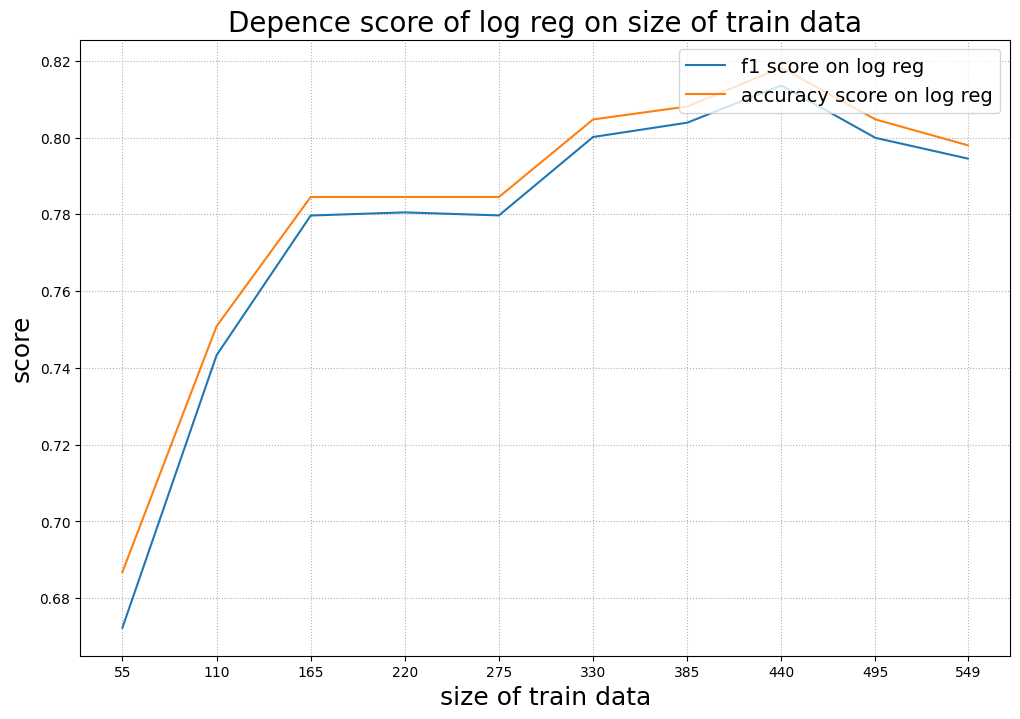

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(sizes, f1_score_logistic, label='f1 score on log reg')
plt.plot(sizes, accuracy_score_logistic, label='accuracy score on log reg')
plt.xlabel('size of train data', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of log reg on size of train data', fontsize=20)
plt.xticks(sizes)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

По графику видим, что лучший результат достигается при размере 440. Это может быть связано с тем, что при увеличении train data могут появится новые данные, которые будут сильно отличатся от предыдущих, и модель будет перестаиваться и обучаться еще и для них, поэтому она может давать больше ошибочных предположений

Decision tree

In [62]:
f1_score_tree = []
accuracy_score_tree = []
data_train = split_x[0]
target_train = split_y[0]

tree = DecisionTreeClassifier(max_depth=max_depth_dec_tree)
tree.fit(data_train, target_train)
y_pred = tree.predict(x_test_standart)

f1_score_tree.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
accuracy_score_tree.append(accuracy_score(y_true=y_test, y_pred=y_pred))

for k in range(1, 10):
    data_train = np.concatenate((data_train, split_x[k]), axis=0)
    target_train = np.concatenate((target_train, split_y[k]), axis=0)

    tree = DecisionTreeClassifier(max_depth=max_depth_dec_tree)
    tree.fit(data_train, target_train)
    y_pred =  tree.predict(x_test_standart)

    f1_score_tree.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
    accuracy_score_tree.append(accuracy_score(y_true=y_test, y_pred=y_pred))

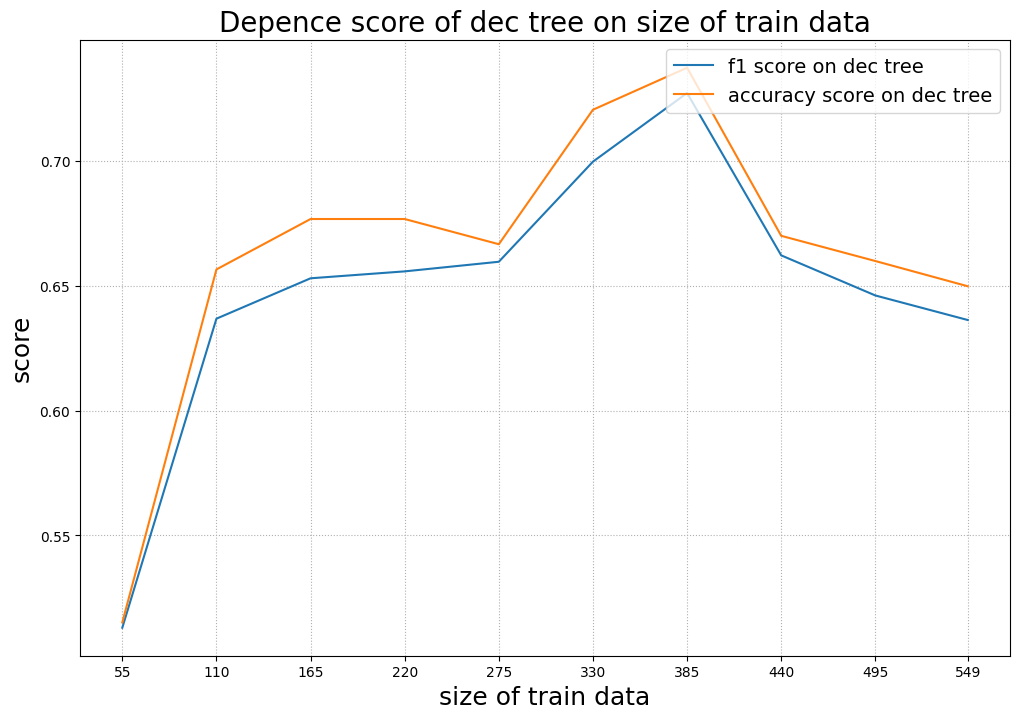

In [63]:
plt.figure(figsize=(12, 8))
plt.plot(sizes, f1_score_tree, label='f1 score on dec tree')
plt.plot(sizes, accuracy_score_tree, label='accuracy score on dec tree')
plt.xlabel('size of train data', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of dec tree on size of train data', fontsize=20)
plt.xticks(sizes)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

Random Forest

In [64]:
f1_score_forest = []
accuracy_score_forest = []
data_train = split_x_base[0]
target_train = split_y[0]

forest = RandomForestClassifier(n_estimators=best_n_est)
forest.fit(data_train, target_train)
y_pred = forest.predict(X_test)

f1_score_forest.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
accuracy_score_forest.append(accuracy_score(y_true=y_test, y_pred=y_pred))

for k in range(1, 10):
    data_train = np.concatenate((data_train, split_x_base[k]), axis=0)
    target_train = np.concatenate((target_train, split_y[k]), axis=0)

    forest = RandomForestClassifier(n_estimators=best_n_est)
    forest.fit(data_train, target_train)
    y_pred =  forest.predict(X_test)

    f1_score_forest.append(f1_score(y_true=y_test, y_pred=y_pred, labels=target_labels, average='macro'))
    accuracy_score_forest.append(accuracy_score(y_true=y_test, y_pred=y_pred))

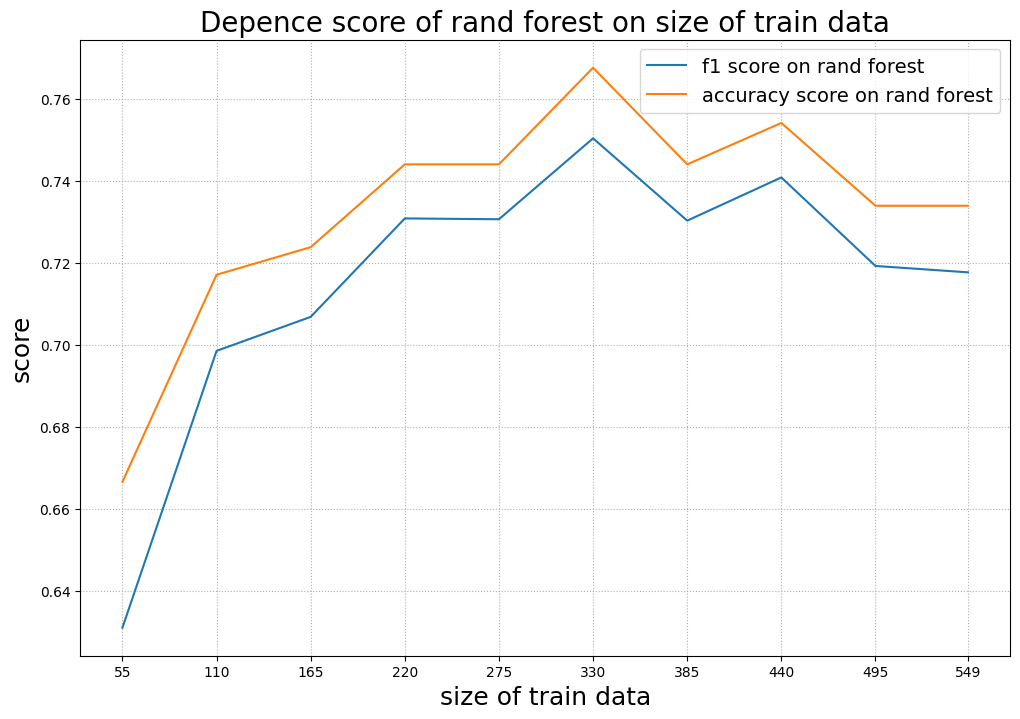

In [65]:
plt.figure(figsize=(12, 8))
plt.plot(sizes, f1_score_forest, label='f1 score on rand forest')
plt.plot(sizes, accuracy_score_forest, label='accuracy score on rand forest')
plt.xlabel('size of train data', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.title('Depence score of rand forest on size of train data', fontsize=20)
plt.xticks(sizes)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

С деревьями похожая ситуация, что и с логистической регрессией. Лучший score они дают примерно на 350-400 данных. Возможно это так же связано с появлением новых данных у которых признаки значительно отличаются